# AI Computer Assignment 5 Phase 1 (Feed Forward Neural Network)
Mohammad Saadati - 
_810198410_

## Introduction
In this project, we implement **Feed Forward neural networks** to classify images.

In Feed Forward neural networks, each image is first flattened and given as a vector as Feed Forward in the input neural networks. Each element of this vector (equivalent to one pixel of the image) is a property for it. Based on these properties and by making nonlinear combinations of them, the network is supposed to adjust the weight of the connections between its layers so that With the least error, correctly predict the corresponding input image class.

In this assignment we will work with a set of `Persian` handwritten numbers. The data set includes images from 10 digits 0 to 9 in Persian. There are a total of 102352 images in this dataset. You can read more about the data set and the number of images of each digit in the data set [here](http://farsiocr.ir/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%AF%D8%A7%D8%AF%D9%87/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%A7%D8%B1%D9%82%D8%A7%D9%85-%D8%AF%D8%B3%D8%AA%D9%86%D9%88%DB%8C%D8%B3-%D9%87%D8%AF%DB%8C/).

### Import Libraries
In this part, some of the necessary libraries were imported in order to use their helpful functions.

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [261]:
data_pkl_file = open("./dataset/data.pkl", 'rb')
data = pickle.load(data_pkl_file)

labels_pkl_file = open("./dataset/labels.pkl", 'rb')
labels = pickle.load(labels_pkl_file)

## Phase 1: Data review and preprocessing
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence. After reading some documents online I came to the understanding that 10% to 30% is a good percentage for test size and by experimenting different values I decided to use the value 20%.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(data , labels , test_size = 0.20 , random_state = 42)

### Question 1:
First, we randomly check and display an image in the train dataset

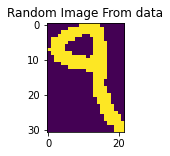


Minimum value in image: 0
Maximum value in image: 255


In [263]:
image = X_train[random.randint(0 , len(X_train) - 1)]

plt.figure(figsize = (2,2))
plt.imshow(image)
plt.title("Random Image From data")
plt.show()

print("\nMinimum value in image: " + str(np.amin(image)))
print("Maximum value in image: " + str(np.amax(image)))

As shown above image values in the dataset which represent the brightness of each pixel is a number between 0 to 255.

### Question 2:
Now resize the images to $25 * 25$. To do this, we use the `resize` function

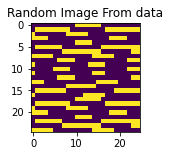


Minimum value in image: 0
Maximum value in image: 255


In [264]:
X_train = [np.resize(element,(25 , 25)) for element in X_train]
X_test = [np.resize(element,(25 , 25)) for element in X_test]

image = X_train[random.randint(0 , len(X_train) - 1)]

plt.figure(figsize = (2 , 2))
plt.imshow(image)
plt.title("Random Image From data")
plt.show()

print("\nMinimum value in image: " + str(np.amin(image)))
print("Maximum value in image: " + str(np.amax(image)))

### Question 3:
In this part, we select and display an image of each class in the train data set. For each image, we display its type along with the image.

========== CLASS No. 0 ==========


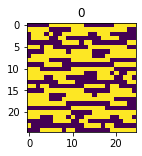

========== CLASS No. 1 ==========


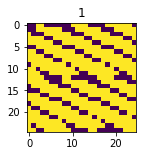

========== CLASS No. 2 ==========


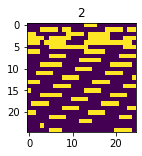

========== CLASS No. 3 ==========


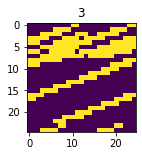

========== CLASS No. 4 ==========


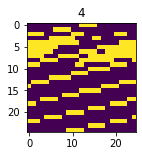

========== CLASS No. 5 ==========


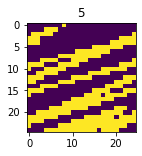

========== CLASS No. 6 ==========


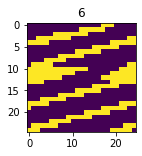

========== CLASS No. 7 ==========


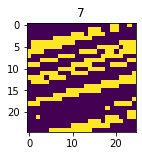

========== CLASS No. 8 ==========


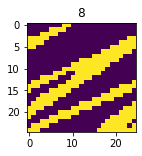

========== CLASS No. 9 ==========


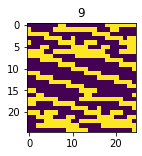

In [265]:
for i in range(0,10):
    index = 0
    while Y_train[index] != i:
        index += 1
    image = X_train[index]
    print("========== CLASS No.",str(i),"==========")
    plt.figure(figsize = (2 , 2))
    plt.imshow(image)
    plt.title(i)
    plt.show()

### Question 4:
Now calculate the number of images in each category for the test and train datasets and draw a bar chart for them.

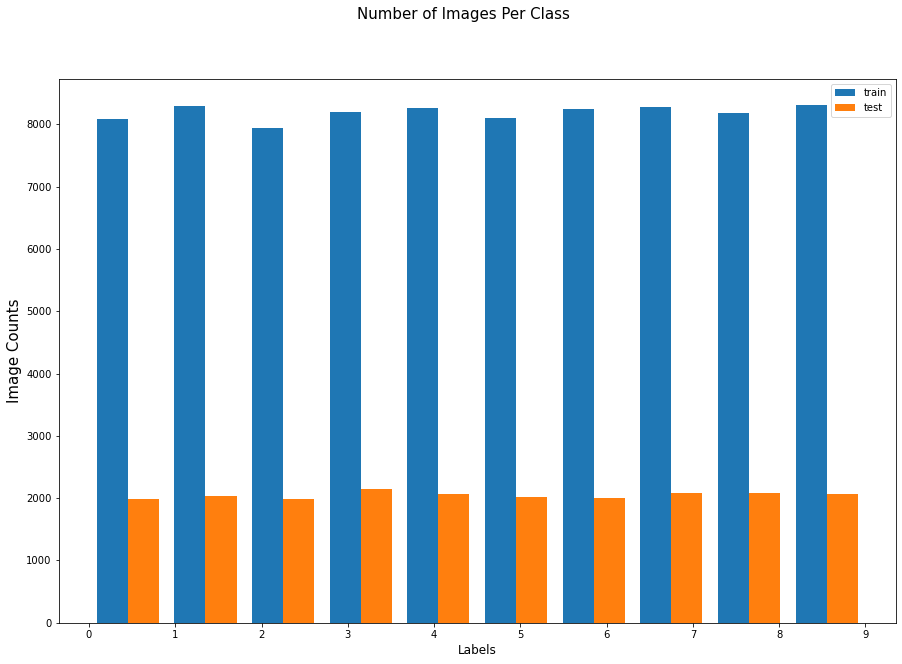

In [266]:
fig = plt.figure(figsize=(15, 10))
plt.hist((Y_train, Y_test), label=['train', 'test'])
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Image Counts', fontsize = 15)
plt.suptitle('Number of Images Per Class', fontsize = 15)
plt.legend()
plt.xticks(range(0,10))
plt.show()

### Question 5:
In this section, scale the amount of data so that the value of each pixel is between 0 and 1 before giving information to the neural network. 

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1. Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.Since maximum value in the dataset is 255 it's a good idea to divide every value in the dataset by 255, this will result in each value being between 0 to 1. The reason that this procedure is done is that higher numbers in the network will make it biased meaning that since the difference between values in the range of 0 to 255 is a lot the effect of a value like 1 can easily be vanished comapred to 255 so it's a wise move to scale the values down to make each of them have somewhat of a equal impact in the network. Biased network can result in lower accuracy and all in all a poor model.

In [267]:
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

X_train = X_train / 255
X_test = X_test / 255

## Phase 2: Completing the incomplete parts of given Code for the Neural Network

### Dataloader

In [268]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        # TODO: Implement
#         labels = labels.astype(int)
#         onehot_vectors = np.zeros((labels.size, n_classes))
#         onehot_vectors[np.arange(labels.size), labels] = 1.0
#         return onehot_vectors
        onehot_vectors = pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        # TODO: Implement
        rp = np.random.permutation(len(self.__data))
        self.__data = self.__data[rp]
        self.__onehot_labels = self.__onehot_labels[rp]
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

### Activation Functions
In this part, we completed _val_ and *derivative* methods of activation function classes.

An activation function defines how the weighted sum of the layer input is transformed into an output from a node/s in the network.

We used the following formulas to implement these activation functions:

$$  Identical(x) = x \quad \text{and} \quad Identical'(x) = 1 $$

$$ 
Relu(x) = \begin{cases} x & x \geq 0\\
0 & x < 0 \end{cases}  \quad \text{and} \quad 
Relu'(x) = \begin{cases} 1 & x \geq 0\\
0 & x < 0 \end{cases} 
$$

$$ 
LeakyRelu(x) = \begin{cases} x & x \geq 0\\
\text{negative_slope}*x & x < 0 \end{cases} \quad \text{and} \quad 
LeakyRelu'(x) = \begin{cases} 1 & x \geq 0\\
\text{negative_slope} & x < 0 \end{cases} 
$$

$$ 
Sigmoid(x) = \frac{1}{1+e^{-x}} \quad \text{and} \quad 
Sigmoid'(x) = Sigmoid(x)(1-Sigmoid(x)) 
$$

$$ 
Softmax(x : matrix) = \frac{e^x_i}{\sum_{j=1}^{J} e^x_j}  \quad for \quad i = 1,...,Z \quad and \quad x = (x_1, x_2,...,x_Z)
$$

$$ 
Tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \quad \text{and} \quad 
Tanh'(x) = 1-Tanh(x)^2 
$$

In [305]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self):
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.matrix(np.maximum(temp, 0.))
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        # TODO: Implement
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative < 0] = 0.0
        relu_derivative[relu_derivative >= 0] = 1.0
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp >= 0, temp, temp * self.negative_slope))
        return leacky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
#         leaky_relu_derivative = 1.0
#         leaky_relu_derivative[temp < 0.] = self.negative_slope
        leaky_relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp < 0, self.negative_slope, 1.0)))
        return leaky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = np.matrix(1.0/(1.0 + np.exp(-temp)))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.multiply(self.__val(temp), (1. - self.__val(temp)))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        softmax_value = np.exp(temp - np.max(temp))
        softmax_value /= softmax_value.sum(axis=1)
        return softmax_value

#         temp = np.matrix(matrix, dtype=float)    
#         softmax_value = np.apply_along_axis(lambda row: np.exp(row - np.max(row))/np.sum(np.exp(row - np.max(row))), 1, temp)
#         return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): 
      '''
      This is the constructor. It does not have any fields
      as a result, there is no need to do anything in the constructor.
      '''
      pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.matrix((np.exp(temp) - np.exp(-temp))/(np.exp(temp) + np.exp(-temp)))
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1. - np.power(self.__val(temp), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

### Loss Function
In this part, we completed _val_ and *derivative* methods of CrossEntropy classes. It is assumed that `Sofmax` is applied before using the following formulas.
$$ CrossEntropy(y, \hat y) = -\sum_{i} y_i \log{\hat y_i} $$

$$ CrossEntropy'(y, \hat y) = y - \hat y $$

In [270]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
#         softmax = Softmax()
#         cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), \
#                                                   np.log(softmax(true_val))), axis=1)
#         return cross_entropy_value
    
        true_val_mat = np.matrix(true_val, dtype=float)
        cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
#         softmax = Softmax()
#         cross_entropy_derivative = softmax(true_val) - expected_val
#         return cross_entropy_derivative

        true_val_mat = np.matrix(true_val, dtype=float)                          
        cross_entropy_derivative = Softmax()(true_val_mat) - np.matrix(expected_val, dtype=float)                                 
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

### Layer
In this part, we completed _forward_, *update_weights*, *uniform_weight*, and *normal_weight* methods of Layer class. 

We used the following formulas to update weights at the end of each batch:

$$ \frac{\partial L}{\partial W} = x^T\frac{\partial L}{\partial y} $$

$$ \frac{\partial L}{\partial b} = 1\frac{\partial L}{\partial y} $$

$$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y}W^T $$

In [271]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement
#         self.__last_input = layer_input
#         self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
#         self.__last_activation_output = self.__activation(self.__last_activation_input)
#         self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
#         return self.__last_activation_output
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement
        backprop_tensor = np.multiply(backprop_tensor, self.__last_activation_derivative)
        self.__weight -= (lr * np.dot(self.__last_input.T, backprop_tensor))
        self.__bias -= (lr * np.dot(np.ones((1, backprop_tensor.shape[0])), backprop_tensor))
        backprop_tensor = np.dot(backprop_tensor, self.__weight.T)
        return backprop_tensor
    
#         ones_matrix = np.matrix(np.ones((np.size(backprop_tensor,0), 1)))
#         dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
#         db = np.matmul(np.transpose(ones_matrix), dy)
#         dw = np.matmul(np.transpose(self.__last_input), dy)
#         backprop_tensor = np.matmul(dy, np.transpose(self.__weight))
#         self.__weight -= lr * dw
#         self.__bias -= lr * db
#         return backprop_tensor
        

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
#         weights = np.random.uniform(low, high=high, size=(dim1, dim2))
        weights = np.matrix(np.random.uniform(low, high, size=(dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
#         weights = np.random.normal(loc=mean, scale=var, size=(dim1, dim2))
        weights = np.matrix(np.random.normal(mean, sqrt(var), size=(dim1, dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

### Feed Forward Neural Network

In [272]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement
        network_output = network_input
#         for i in range(len(self.__layers_list)):
#             network_output = self.__layers_list[i].forward(network_output)
#             if i == (len(self.__layers_list)-2):
#                 self.__before_last = network_output
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        # TODO: Implement
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(y_batch, network_output)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        self.__update_weights(network_output, y_batch) 
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        # TODO: Implement
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        # TODO: Implement
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        # TODO: Implement
#         accuracy = ((self.__get_labels(output) == self.__get_labels(expected_output)).sum()/output.shape[0]) * 100
#         return accuracy
    
        accuracy = np.count_nonzero(self.__get_labels(output) == self.__get_labels(expected_output)) / np.size(output, 0) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        # TODO: Implement
        backprop_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backprop_tensor = layer.update_weights(backprop_tensor, self.__lr)
        return

## Phase 3: Data Classification
In this phase, we will implement and train Feed Forward neural networks with different parameters using the `FeedForwardNN` class.

In [273]:
def expand_pixels_numbers(inp):
    r = []
    for i in inp:
        rr = []
        for j in i:
            for k in j:
                rr.append(k)
        r.append(rr)
    return r

In [274]:
X_train, X_test = expand_pixels_numbers(X_train.tolist()), expand_pixels_numbers(X_test.tolist())

In [275]:
X_train = pd.DataFrame(data=X_train, columns=["PixelNo. %i" % x for x in range(1, 25*25 + 1)])
X_test = pd.DataFrame(data=X_test, columns=["PixelNo.%i" % x for x in range(1, 25*25 + 1)])

In [276]:
Y_train = pd.DataFrame(data=Y_train.tolist(), columns=["labels"])
Y_test = pd.DataFrame(data=Y_test.tolist(), columns=["labels"])

### Training Sample Code

In [277]:
# Sample code for building and training a model

INPUT_SHAPE = 25*25
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32

TRAINLOADER = [batch for batch in Dataloader(X_train, Y_train, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(X_test, Y_test, n_classes=10, batch_size=BATCH_SIZE, shuffle=False)]

In [282]:
network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
# network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
# network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

In [283]:
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


<ipython-input-269-1eaff58b510a>:262: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)


	Train: Average Accuracy: 9.879493942946464	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average

### Part I: Network training

The neural network that I implemented consists of `1` input layer, `1` hidden layer and `1` output layer. `625` input nodes, `45` hidden nodes and `10` output nodes corresponding to `10` labels that we have.

I have tried higher number of hidden nodes and it'll result in higher accuracy.

In [283]:
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


<ipython-input-269-1eaff58b510a>:262: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)


	Train: Average Accuracy: 9.879493942946464	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average

In [297]:
INPUT_SHAPE = 25*25
LEARNING_RATE = 0.00003
EPOCHS = 15
BATCH_SIZE = 32

print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
# network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.13594177413052	Average Loss: 2.274236090861463
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.2497816750304755
Epoch 2:
	Train: Average Accuracy: 13.599892536146932	Average Loss: 2.2116339947414927
	Test: Average Accuracy: 17.997834578804348	Average Loss: 2.14593783169617
Epoch 3:
	Train: Average Accuracy: 25.962924970691677	Average Loss: 2.0441111997798647
	Test: Average Accuracy: 28.236030910326086	Average Loss: 1.924262480835608
Epoch 4:
	Train: Average Accuracy: 39.95447440406409	Average Loss: 1.815911884507805
	Test: Average Accuracy: 42.33738111413044	Average Loss: 1.7091154616432582
Epoch 5:
	Train: Average Accuracy: 49.041617819460726	Average Loss: 1.6221445186851413
	Test: Average Accuracy: 51.01796025815217	Average Loss: 1.5415970347724464
Epoch 6:
	Train: Average Accuracy: 54.691139116842514	Average Loss: 1.4740983370619634
	Test: Average Accuracy: 55.81967561141305	Average Loss: 1.417192653936798
Epoch 7:
	Train: Average Acc

### Part II : Network Weighting

If zero initial weights are chosen, then the learning rate has no influence on a neuron's predicted class label. If you initialize all weights with zeros then every hidden unit will get zero independent of the input since the weight matrix is all zeros and multiplication will result in zero. So, when all the hidden neurons start with the zero weights, then all of them will follow the same gradient and for this reason starting with zeros affects only the scale of the weight vector, not the direction. Also, having zero weights to start with will prevent the network from learning. The errors backpropagated through the network is proportional to the value of the weights. If all the weights are the same, then the backpropagated errors will be the same, so all of the weights will be updated by the same amount which means the whole process was useless. To avoid this problem, the initial weights of the network should be unequal a way of doing this is to assign random values to weights.

In [284]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='zero')
# network.add_layer(40, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='zero')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-269-1eaff58b510a>:262: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)


	Train: Average Accuracy: 9.86117624071903	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average 

### Part III : Impact of learning rate

In this section, by decreasing and increasing the `learning rate` parameter, we will train the network and find the optimal value for our network

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

In [289]:
LEARNING_RATE = 0.00001
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.95398593200469	Average Loss: 2.2774711352978065
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.272040572718839
Epoch 2:
	Train: Average Accuracy: 10.090758108636185	Average Loss: 2.2661612047644035
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.261050516012077
Epoch 3:
	Train: Average Accuracy: 10.282483391949981	Average Loss: 2.254204774117048
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.2476955347380967
Epoch 4:
	Train: Average Accuracy: 10.538931223134037	Average Loss: 2.238805752980102
	Test: Average Accuracy: 9.715735394021738	Average Loss: 2.2296398835410445
Epoch 5:
	Train: Average Accuracy: 10.995652598671356	Average Loss: 2.2170932285206777
	Test: Average Accuracy: 9.852454144021738	Average Loss: 2.20337413551036
Epoch 6:
	Train: Average Accuracy: 13.031701836654943	Average Loss: 2.184871050986452
	Test: Average Accuracy: 14.021314538043478	Average Loss: 2.1640168321341804
Epoch 7:
	Train: Average Accur

In [288]:
LEARNING_RATE = 0.00005
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 11.766901133255178	Average Loss: 2.2596043007486792
	Test: Average Accuracy: 17.983186141304348	Average Loss: 2.1815058427636465
Epoch 2:
	Train: Average Accuracy: 27.180930050801095	Average Loss: 2.021627236313528
	Test: Average Accuracy: 35.70163892663044	Average Loss: 1.82325061234299
Epoch 3:
	Train: Average Accuracy: 45.39917936694021	Average Loss: 1.6667743348707176
	Test: Average Accuracy: 52.18198029891305	Average Loss: 1.520542596062058
Epoch 4:
	Train: Average Accuracy: 55.00532434544744	Average Loss: 1.422904970898598
	Test: Average Accuracy: 57.867484714673914	Average Loss: 1.3388313511025711
Epoch 5:
	Train: Average Accuracy: 60.56271981242673	Average Loss: 1.2707102282258864
	Test: Average Accuracy: 61.422172214673914	Average Loss: 1.2246669955596834
Epoch 6:
	Train: Average Accuracy: 63.49843688940992	Average Loss: 1.1731521757241146
	Test: Average Accuracy: 63.873344089673914	Average Loss: 1.1521244389270042
Epoch 7:
	Train: Average Ac

In [294]:
LEARNING_RATE = 0.00007
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  7e-05 

Epoch 1:
	Train: Average Accuracy: 14.16041422430637	Average Loss: 2.2352796942513846
	Test: Average Accuracy: 23.35130774456522	Average Loss: 2.0526501576811262
Epoch 2:
	Train: Average Accuracy: 38.36571903087143	Average Loss: 1.8062897182027855
	Test: Average Accuracy: 51.21815557065217	Average Loss: 1.5693651612384105
Epoch 3:
	Train: Average Accuracy: 53.94656115670184	Average Loss: 1.4377058846219217
	Test: Average Accuracy: 58.24643342391305	Average Loss: 1.3200910443714953
Epoch 4:
	Train: Average Accuracy: 60.97235248143806	Average Loss: 1.2432015082271102
	Test: Average Accuracy: 62.335258152173914	Average Loss: 1.1883995462233803
Epoch 5:
	Train: Average Accuracy: 64.49912075029309	Average Loss: 1.1338904219994506
	Test: Average Accuracy: 64.8206097146739	Average Loss: 1.1131513431913427
Epoch 6:
	Train: Average Accuracy: 66.65328253223916	Average Loss: 1.0699264414612395
	Test: Average Accuracy: 66.6370159646739	Average Loss: 1.0671715273856648
Epoc

In [286]:
LEARNING_RATE = 0.00010
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 16.648642047674873	Average Loss: 2.2072149735442728
	Test: Average Accuracy: 32.216372282608695	Average Loss: 1.8725964894724392
Epoch 2:
	Train: Average Accuracy: 46.10712192262603	Average Loss: 1.6017196007231087
	Test: Average Accuracy: 56.375254755434774	Average Loss: 1.362076100274282
Epoch 3:
	Train: Average Accuracy: 59.71243649863228	Average Loss: 1.2563072041275694
	Test: Average Accuracy: 62.420176630434774	Average Loss: 1.1758403440818936
Epoch 4:
	Train: Average Accuracy: 64.55285267682689	Average Loss: 1.118556834898778
	Test: Average Accuracy: 65.37427819293478	Average Loss: 1.0985206054763377
Epoch 5:
	Train: Average Accuracy: 66.87710042985542	Average Loss: 1.053602577306038
	Test: Average Accuracy: 66.63892663043478	Average Loss: 1.056985721477193
Epoch 6:
	Train: Average Accuracy: 68.20085971082455	Average Loss: 1.0144131968458394
	Test: Average Accuracy: 67.62525475543478	Average Loss: 1.0297146653277678
Epoch 7:
	Train: Average Acc

In [290]:
LEARNING_RATE = 0.00015
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 20.44597499023056	Average Loss: 2.244464124939393
	Test: Average Accuracy: 44.13828974184783	Average Loss: 1.6711032378508155
Epoch 2:
	Train: Average Accuracy: 45.02828253223915	Average Loss: 1.8352425101113234
	Test: Average Accuracy: 53.83555536684783	Average Loss: 1.4894289133942311
Epoch 3:
	Train: Average Accuracy: 47.0326299335678	Average Loss: 2.7143680459786963
	Test: Average Accuracy: 37.31700067934783	Average Loss: 3.424777073867182
Epoch 4:
	Train: Average Accuracy: 38.78077373974209	Average Loss: 11.406613011689743
	Test: Average Accuracy: 28.53685461956522	Average Loss: 21.915892753153354
Epoch 5:


<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-269-1eaff58b510a>:262: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)


	Train: Average Accuracy: 27.29596522078937	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 9:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 10:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 11:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 12:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Aver

By checking multiple values for learning rate, optimal `learning rate` was around $0.00007$

**Learning Rate * 0.1**

Now, when we multiplied the optimum learning rate by 0.1, the speed of the learning process decreased and it seems that we need more epochs to converge to the highest accuracy.

In [295]:
LEARNING_RATE = 0.00007 * 0.1
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  7e-06 

Epoch 1:
	Train: Average Accuracy: 9.99184251660805	Average Loss: 2.277086793710926
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.272934209659802
Epoch 2:
	Train: Average Accuracy: 10.083431027745213	Average Loss: 2.2681288042990064
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.264816411974413
Epoch 3:
	Train: Average Accuracy: 10.166471277842907	Average Loss: 2.25956083453256
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.255590184057596
Epoch 4:
	Train: Average Accuracy: 10.259280969128566	Average Loss: 2.2494896394412818
	Test: Average Accuracy: 9.710852581521738	Average Loss: 2.2444184478855465
Epoch 5:
	Train: Average Accuracy: 10.460775693630325	Average Loss: 2.236963548724847
	Test: Average Accuracy: 9.720618206521738	Average Loss: 2.2302082915267554
Epoch 6:
	Train: Average Accuracy: 11.011527940601798	Average Loss: 2.2207384286192275
	Test: Average Accuracy: 10.550696331521738	Average Loss: 2.211544471178462
Epoch 

**Learning Rate * 10**

Now, when we multiplied the optimum learning rate by 10, we faced with the problem of dying *Relu* and its obvious because weight will increase and it can cuase in vanishing in gradients. We can see that there is a small change between accuracies of different epochs.

In [296]:
LEARNING_RATE = 0.00007 * 10
print("Learning Rate = ", LEARNING_RATE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  0.0006999999999999999 

Epoch 1:


<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: divide by zero encountered in log
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-270-1e27c19a66a1>:34: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float), np.log(Softmax()(true_val_mat))), axis=1)
<ipython-input-269-1eaff58b510a>:262: RuntimeWarning: invalid value encountered in true_divide
  softmax_value /= softmax_value.sum(axis=1)


	Train: Average Accuracy: 9.867282141461509	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 2:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 3:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 4:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 5:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 6:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 7:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average Accuracy: 9.710852581521738	Average Loss: nan
Epoch 8:
	Train: Average Accuracy: 9.870945681906996	Average Loss: nan
	Test: Average

If the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny. If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

### Part IV :  Impact of activation function

In this part, we measure the performance of the network designed in the first part using different *Activation Functions* and compare the results.

#### Sigmoid

In [298]:
LEARNING_RATE = 0.00003

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.033899960922236	Average Loss: 2.3030575701598983
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3027003872680796
Epoch 2:
	Train: Average Accuracy: 10.03267878077374	Average Loss: 2.302885904139001
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.30269513092826
Epoch 3:
	Train: Average Accuracy: 10.033899960922236	Average Loss: 2.302880691532124
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.302689898279914
Epoch 4:
	Train: Average Accuracy: 10.036342321219227	Average Loss: 2.3028754872074093
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3026846730290558
Epoch 5:
	Train: Average Accuracy: 10.038784681516217	Average Loss: 2.302870288127039
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.3026794520371325
Epoch 6:
	Train: Average Accuracy: 10.043669402110199	Average Loss: 2.302865091189496
	Test: Average Accuracy: 10.20210597826087	Average Loss: 2.302674232190302
Epoch 7:
	Train: Average Accura

#### Hyperbolic Tangent

In [299]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.151133255177804	Average Loss: 2.303093955075309
	Test: Average Accuracy: 10.19722316576087	Average Loss: 2.302662290613026
Epoch 2:
	Train: Average Accuracy: 10.085189527159047	Average Loss: 2.302868714632748
	Test: Average Accuracy: 10.19722316576087	Average Loss: 2.3026622587908725
Epoch 3:
	Train: Average Accuracy: 10.085189527159047	Average Loss: 2.3028686828513965
	Test: Average Accuracy: 10.19722316576087	Average Loss: 2.3026622280006643
Epoch 4:
	Train: Average Accuracy: 10.085189527159047	Average Loss: 2.302868650761749
	Test: Average Accuracy: 10.19722316576087	Average Loss: 2.30266219719742
Epoch 5:
	Train: Average Accuracy: 10.085189527159047	Average Loss: 2.302868618657356
	Test: Average Accuracy: 10.19722316576087	Average Loss: 2.302662166380864
Epoch 6:
	Train: Average Accuracy: 10.085189527159047	Average Loss: 2.302868586537965
	Test: Average Accuracy: 10.19722316576087	Average Loss: 2.302662135550748
Epoch 7:
	Train: Average Accurac

#### Leaky ReLU

In [306]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.310570535365377	Average Loss: 2.2682267676285726
	Test: Average Accuracy: 9.769446331521738	Average Loss: 2.238635004703592
Epoch 2:
	Train: Average Accuracy: 15.399032825322392	Average Loss: 2.1885827719258946
	Test: Average Accuracy: 19.194123641304348	Average Loss: 2.1063805712823496
Epoch 3:
	Train: Average Accuracy: 28.701152794060178	Average Loss: 1.9966498440818374
	Test: Average Accuracy: 30.648140285326086	Average Loss: 1.8762818388234983
Epoch 4:
	Train: Average Accuracy: 42.1840074247753	Average Loss: 1.77403485237334
	Test: Average Accuracy: 45.03651494565217	Average Loss: 1.6730451140952762
Epoch 5:
	Train: Average Accuracy: 50.62915201250488	Average Loss: 1.588829363997444
	Test: Average Accuracy: 52.94178838315217	Average Loss: 1.5107791637860857
Epoch 6:
	Train: Average Accuracy: 55.744138335287225	Average Loss: 1.4442355447753832
	Test: Average Accuracy: 56.70346467391305	Average Loss: 1.3897392051155202
Epoch 7:
	Train: Average Ac

#### Why Sigmoid and Tanh do not work well?
In Tanh and Sigmoid moving towards the ends of the function, y values react very little to the changes in x so the derivative values in these regions are very small and converge to 0. This is called the vanishing gradient and the learning is minimal meaning that it makes the learning process be very slow or even useless. We know that if 0, not any learning. When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot get maximum performance from the artificial neural network model.

So by the explanation above Tanh and Sigmoid will result in vanishing gradient meaning that after a while the learning process will be very slow. So since we are using Stochastic Gradient Descent, these activation functions, Sigmoid and Tanh, won't be the best choice.

#### Why Leaky-Relu is better than Relu?
Unlike Relu, LeakyRelu is more balanced and may therefore learn faster. Also LeakyRelu fixes the dying Relu problem, as it doesn’t have zero-slope parts.

Dying relu problem: A Relu neuron is dead if it’s stuck in the negative side and always outputs 0. Because the slope of Relu in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing.

Since LeakyRelu assigns a small non zero value for negative parts this will result in solving the problem mentioned above and this is the main advantage of LeakyRelu.

LeakyRelu and Relu results are really close to each other but LeakyRelu result value is a bit higher so at the end I chose LeakyRelu.

### Part V : Impact of batch size

#### Setting Batch-Size to 16
In this part, when we set the `batch-size` to $16$, the speed of learning increased and our model reached to the desirable accuracy faster. It is obvious that the more batches we train our model, the more weight updates are performed and we get better results.

In [307]:
LEARNING_RATE = 0.00007 
print("Learning Rate = ", LEARNING_RATE, "\n")

BATCH_SIZE = 16
print("Batch Size = ", BATCH_SIZE, "\n")


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Learning Rate =  7e-05 

Batch Size =  16 

Epoch 1:
	Train: Average Accuracy: 13.786733098866744	Average Loss: 2.245679072815379
	Test: Average Accuracy: 20.96361243206522	Average Loss: 2.085087051896463
Epoch 2:
	Train: Average Accuracy: 37.183616647127785	Average Loss: 1.8274579745885546
	Test: Average Accuracy: 50.65769361413044	Average Loss: 1.5720876832247668
Epoch 3:
	Train: Average Accuracy: 54.13672332942556	Average Loss: 1.4327819134194284
	Test: Average Accuracy: 58.311820652173914	Average Loss: 1.3117649855105569
Epoch 4:
	Train: Average Accuracy: 61.25532434544744	Average Loss: 1.234550623080016
	Test: Average Accuracy: 62.506156589673914	Average Loss: 1.1817337477028953
Epoch 5:
	Train: Average Accuracy: 64.57971864009379	Average Loss: 1.1291041395285355
	Test: Average Accuracy: 65.1331097146739	Average Loss: 1.1102991442583412
Epoch 6:
	Train: Average Accuracy: 66.67037905431809	Average Loss: 1.0689174035533346
	Test: Average Accuracy: 66.5686565896739	Average Loss: 1.06

#### Setting Batch-Size to 256
In this part, when we set the `batch-size` to $256$, the speed of learning decreased. So, it is better to use smaller batch size to make the process of learning faster.

In [308]:
BATCH_SIZE = 256
print("Batch Size = ", BATCH_SIZE, "\n")

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Batch Size =  256 

Epoch 1:
	Train: Average Accuracy: 14.375341930441579	Average Loss: 2.2364712153980393
	Test: Average Accuracy: 20.67552649456522	Average Loss: 2.060876413380826
Epoch 2:
	Train: Average Accuracy: 36.46976357952325	Average Loss: 1.8331498464540321
	Test: Average Accuracy: 50.400815217391305	Average Loss: 1.5918061903399583
Epoch 3:
	Train: Average Accuracy: 54.08177022274326	Average Loss: 1.4398432884431651
	Test: Average Accuracy: 58.59120244565217	Average Loss: 1.3117225131075596
Epoch 4:
	Train: Average Accuracy: 61.379005470887066	Average Loss: 1.231526366510031
	Test: Average Accuracy: 62.721000339673914	Average Loss: 1.1780755139912042
Epoch 5:
	Train: Average Accuracy: 64.73358733880423	Average Loss: 1.1253586766181276
	Test: Average Accuracy: 65.1477581521739	Average Loss: 1.1079904898975617
Epoch 6:
	Train: Average Accuracy: 66.59955060570536	Average Loss: 1.0660710336352712
	Test: Average Accuracy: 66.5881878396739	Average Loss: 1.0658627533204335
Epoch 7:

#### What is the reason for using batch in the training process?
The batch size defines the number of samples that will be propagated through the network.

* It requires less memory. As we train our network using fewer samples, the overall training process requires less memory. This is very important when we are not able to fit the whole dataset in our machine's memory.

* Typically networks train faster with mini-batches, because we update the weights after each propagation. If we used all samples during propagation, we would make only 1 update for the network's parameter and this can lead to underfitting.

#### What is the problem with extremely small batches?

There is no doubt that the smaller the batch is the less accurate the estimation of the gradient will be. If we use extremely small batch size, we would lose the effectiveness of vectorization. Moreover, It will produce a noisier gradient descent. As a result, we prefer to use bigger batch size.

**Advantages** of using a batch size instead of number of all samples are for instance choosing a batch size requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory. Typically networks train faster with batches. That's because we update the weights after each propagation. If we used all samples during propagation we would make only one update for the network's parameter meaning that the update won't occur frequently.

So the main advantage of dividing the whole dataset into batches and train the network with these batches is that parameter updates will happen frequently so the training process will be better also having batches will require less computation power and memory. Also by using batches and incorporating parallel computing the learning process can be much faster but if we use the whole dataset we can't use parallel computing to our advantage.

The smaller the batch the less accurate the estimate of the gradient will be. This means that parameter updates won't be reliable and aren't the best possible updates so the learning process won't be great. On the other hand, smaller batches can lead to better regularization and they'll make the learning process faster and also less memory is needed at each run. Small batch training has been shown to provide improved generalization performance.